In [41]:
import nibabel as nib
from glob import glob
import os
from tqdm import tqdm

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

plt.rcParams["figure.figsize"] = (10,10)

## Nodule info

In [6]:
def load_lidcset(idx, base_dir = "../data/NII_normwinall"):
    img_lst = sorted(glob(os.path.join(base_dir, "*img.nii")))
    mask_lst = sorted(glob(img_lst[idx].replace("img", "mask*")))
    img = nib.load(img_lst[idx]).get_fdata()
    nod = np.array(nib.load(mask_lst[0]).get_fdata())
    
    return img, nod

def normalize255(arr):
    return np.array(((arr - np.min(arr)) / (np.max(arr) - np.min(arr)))*255).astype(np.uint8)

def subtract_nodule(img, nod):
    return np.where(nod!=0, np.min(img), img)

def make_drr(img):
    return np.mean(img.T, axis=2)

def plot_drr(img):
    plt.imshow(make_drr(img), cmap='gray')
    
def plot_overlay(background, foreground, alpha=0.7, cmap_1='gray', cmap_2='jet'):
    a1 = plt.subplot(1, 1, 1)
    plt.imshow(np.mean(background.T, axis=2), cmap=cmap_1)
    plt.imshow(np.mean(foreground.T, axis=2), cmap=cmap_2, alpha=alpha)
#     a1.axis('off')
    plt.show()
    
def plot_contour (background, foreground, colour=(255, 0, 0), thickness=1):
    
    background = normalize255(np.mean(background.T, axis=2))
    foreground = foreground > 6
    foreground = np.array(np.max(foreground.T, axis=2)*255).astype(np.uint8)
    
    contours, _ = cv2.findContours(foreground, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    background = cv2.cvtColor(np.float32(background), cv2.COLOR_GRAY2RGB)
    
    for c in contours:
        cv2.drawContours(background,[c],-1,colour,thickness)

    a1 = plt.subplot(1, 1, 1)
    plt.imshow(background.astype(np.uint8))
#     a1.axis('off')
    plt.show()

In [12]:
df_nod = pd.read_csv("../preprocess/nod_2925.csv")

In [13]:
df_nod

,path,nod_id,sid,series_uid,nii_path,height,width,depth
0,NII_norm/LIDC-IDRI-0001_01-01-2000-NA-NA-30178...,LIDC-IDRI-0001-00,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,NII_norm/LIDC-IDRI-0001_01-01-2000-NA-NA-30178...,22,26,29
1,NII_norm/LIDC-IDRI-0002_01-01-2000-NA-NA-98329...,LIDC-IDRI-0002-00,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,NII_norm/LIDC-IDRI-0002_01-01-2000-NA-NA-98329...,34,33,23
2,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-00,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,24,30,25
3,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-01,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,10,11,8
4,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-02,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,13,13,14
...,...,...,...,...,...,...,...,...
2920,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,LIDC-IDRI-1011-02,LIDC-IDRI-1011,1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257...,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,20,25,20
2921,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,LIDC-IDRI-1011-09,LIDC-IDRI-1011,1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257...,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,0,2,1
2922,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,LIDC-IDRI-1012-00,LIDC-IDRI-1012,1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551...,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,6,5,7
2923,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,LIDC-IDRI-1012-01,LIDC-IDRI-1012,1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551...,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,8,5,7


In [101]:
df_nodh

,path,nod_id,sid,series_uid,nii_path,height,width,depth
0,NII_norm/LIDC-IDRI-0001_01-01-2000-NA-NA-30178...,LIDC-IDRI-0001-00,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,NII_norm/LIDC-IDRI-0001_01-01-2000-NA-NA-30178...,22,26,29
1,NII_norm/LIDC-IDRI-0002_01-01-2000-NA-NA-98329...,LIDC-IDRI-0002-00,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,NII_norm/LIDC-IDRI-0002_01-01-2000-NA-NA-98329...,34,33,23
2,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-00,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,24,30,25
3,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-01,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,10,11,8
4,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,LIDC-IDRI-0003-02,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NII_norm/LIDC-IDRI-0003_01-01-2000-NA-NA-94866...,13,13,14
...,...,...,...,...,...,...,...,...
2920,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,LIDC-IDRI-1011-02,LIDC-IDRI-1011,1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257...,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,20,25,20
2921,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,LIDC-IDRI-1011-09,LIDC-IDRI-1011,1.3.6.1.4.1.14519.5.2.1.6279.6001.272123398257...,NII_norm/LIDC-IDRI-1011_01-01-2000-NA-CT THORA...,0,2,1
2922,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,LIDC-IDRI-1012-00,LIDC-IDRI-1012,1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551...,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,6,5,7
2923,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,LIDC-IDRI-1012-01,LIDC-IDRI-1012,1.3.6.1.4.1.14519.5.2.1.6279.6001.153646219551...,NII_norm/LIDC-IDRI-1012_01-01-2000-1-CHEST-346...,8,5,7


In [95]:
df_size = pd.read_csv("../nodulesize.csv")

In [100]:
df_nod.series_uid.value_counts()

1.3.6.1.4.1.14519.5.2.1.6279.6001.195557219224169985110295082004    24
1.3.6.1.4.1.14519.5.2.1.6279.6001.316643107252485100789257057503    23
1.3.6.1.4.1.14519.5.2.1.6279.6001.239358021703233250639913775427    23
1.3.6.1.4.1.14519.5.2.1.6279.6001.955688628308192728558382581802    22
1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437    19
                                                                    ..
1.3.6.1.4.1.14519.5.2.1.6279.6001.627998298349675613581885874395     1
1.3.6.1.4.1.14519.5.2.1.6279.6001.109203031650348694844047454215     1
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492     1
1.3.6.1.4.1.14519.5.2.1.6279.6001.395623571499047043765181005112     1
1.3.6.1.4.1.14519.5.2.1.6279.6001.227962600322799211676960828223     1
Name: series_uid, Length: 827, dtype: int64

In [98]:
df_size[df_size.over3mm > 0]

,pid,total,over3mm,under3mm
0,LIDC-IDRI-0001,4,1,3
1,LIDC-IDRI-0002,12,1,11
2,LIDC-IDRI-0003,4,4,0
3,LIDC-IDRI-0004,4,1,3
4,LIDC-IDRI-0005,9,3,6
...,...,...,...,...
1013,LIDC-IDRI-1008,7,6,1
1014,LIDC-IDRI-1009,2,1,1
1015,LIDC-IDRI-1010,10,1,9
1016,LIDC-IDRI-1011,4,4,0


In [29]:
img_lst = sorted(glob("../data/NII_normwinall/*img.nii.gz"))

In [30]:
len(img_lst)

1018

In [46]:
df = pd.read_csv("../preprocess/nii_1018_aview.csv")

In [52]:
for i in tqdm(img_lst):
    img = nib.load(i).get_fdata()
    drr = make_drr(img)
    norm_drr = normalize255(drr)
    
    Image.fromarray(norm_drr).save(i.replace("NII_normwinall/", "DRR_png/").replace(".nii.gz", ".png"))

100%|██████████| 1018/1018 [06:24<00:00,  2.65it/s]


In [92]:
for i, row in tqdm(df_nod.iterrows()):
    try:
        nod = nib.load(row.path.replace("NII_norm", "NII_normwinall")).get_fdata()
        drr = make_drr(nod)
        norm_drr = normalize255(drr)
        mask_drr = norm_drr > 12
        mask_drr = normalize255(np.float16(mask_drr))

        Image.fromarray(mask_drr).save(row.path.replace("NII_norm/", "DRR_mask/").replace(".nii.gz", ".png"))
    except FileNotFoundError:
        continue

2925it [07:07,  6.84it/s]


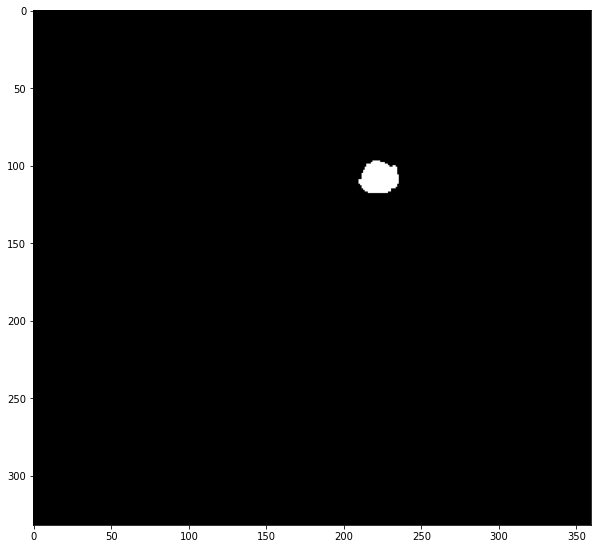

In [84]:
plt.imshow(mask_drr, cmap="gray")

In [14]:
nod = nib.load(df_nod.path[1675]).get_fdata()
img = nib.load(df_nod.nii_path[1675]).get_fdata()

In [15]:
nod_pos = np.where(nod > 6)
nod_only = nod[min(nod_pos[0]):max(nod_pos[0]), min(nod_pos[1]):max(nod_pos[1]), min(nod_pos[2]):max(nod_pos[2])]

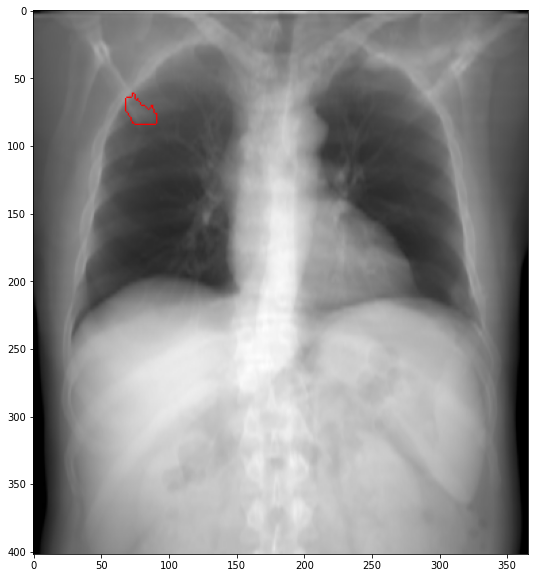

In [16]:
plot_contour(img, nod)

In [17]:
np.where(nod != 0)

(array([196, 196, 196, ..., 229, 229, 229]),
 array([74, 74, 74, ..., 78, 78, 78]),
 array([79, 80, 81, ..., 62, 63, 64]))

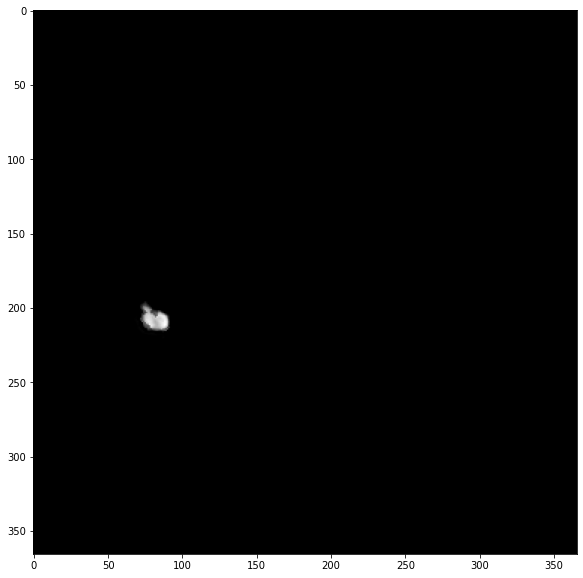

In [21]:
plt.imshow(nod[:, :, 80], cmap='gray')

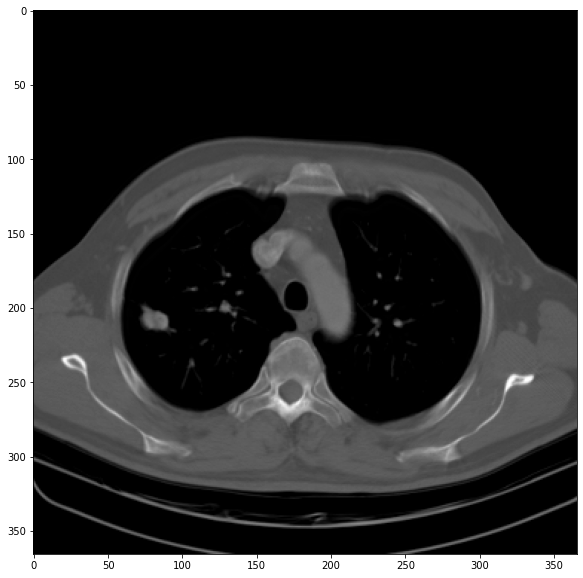

In [22]:
plt.imshow(img[:, :, 80], cmap='gray')

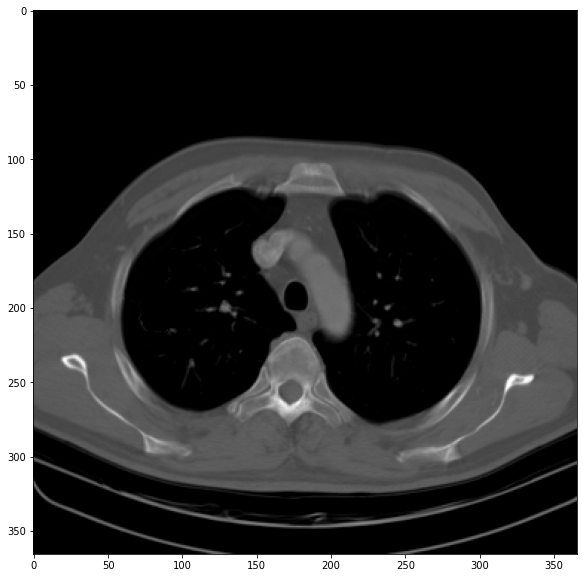

In [23]:
plt.imshow(subtract_nodule(img, nod)[:, :, 80], cmap='gray')

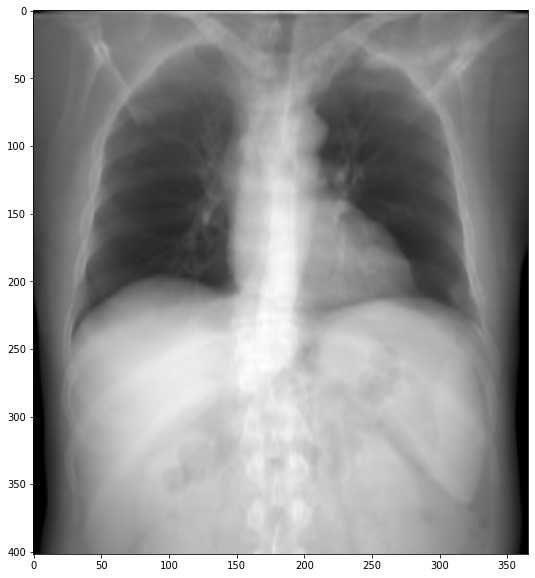

In [24]:
plot_drr(img)

In [ ]:
np.where(nod != 0)

In [3]:
img, nod = load_lidcset(0)

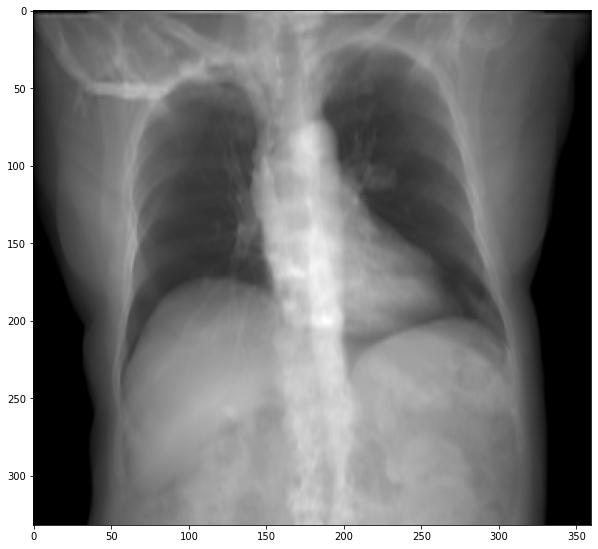

In [4]:
plot_drr(img)

In [10]:
np.min(img)

0.0

In [12]:
np.min(nod)

0.0

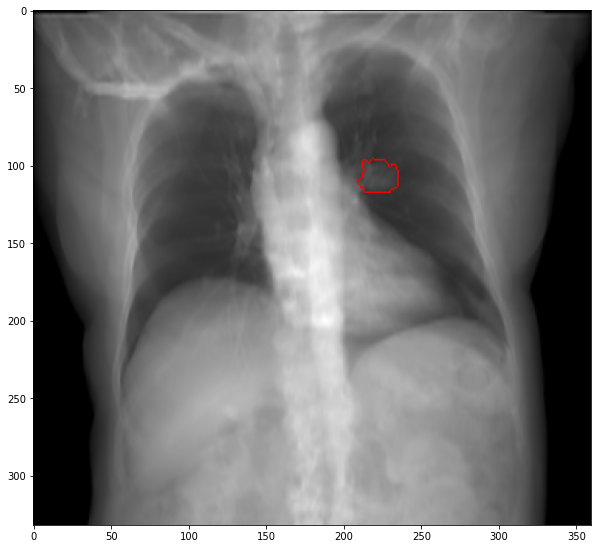

In [174]:
plot_contour(img, nod)

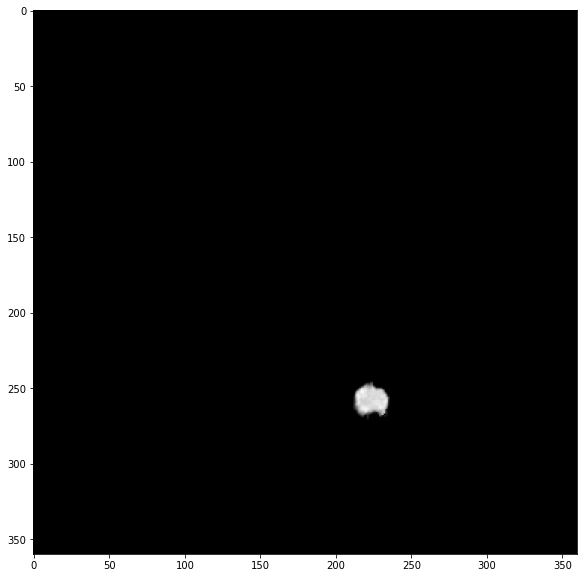

In [164]:
plt.imshow(nod[:, :, 105], cmap='gray')

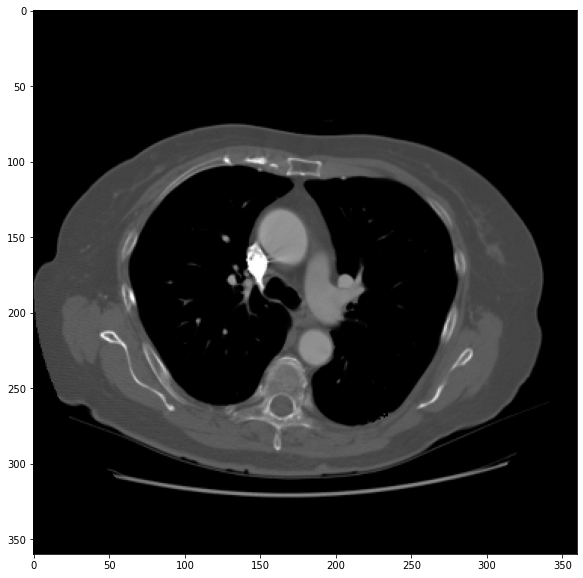

In [142]:
plt.imshow(subtract_nodule(img, nod)[:, :, 105], cmap='gray')

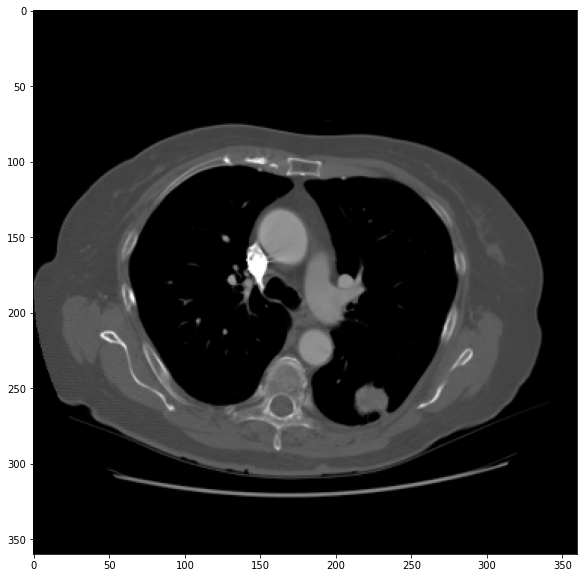

In [143]:
plt.imshow(img[:, :, 105], cmap='gray')

In [149]:
nod_pos = np.where(nod !=0)

In [145]:
nod_only = nod[min(nod_pos[0]):max(nod_pos[0]), min(nod_pos[1]):max(nod_pos[1]), min(nod_pos[2]):max(nod_pos[2])]

In [175]:
nod_only.shape

(31, 27, 31)

In [147]:
nod_only.shape[-1]//2

15

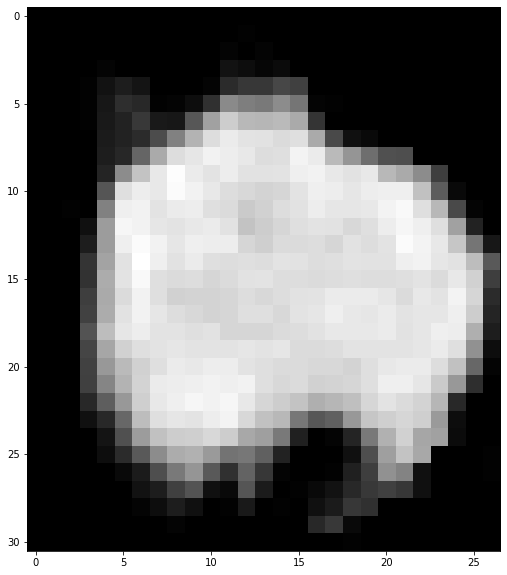

In [148]:
plt.imshow(nod_only[:, :, nod_only.shape[-1]//2], cmap='gray')

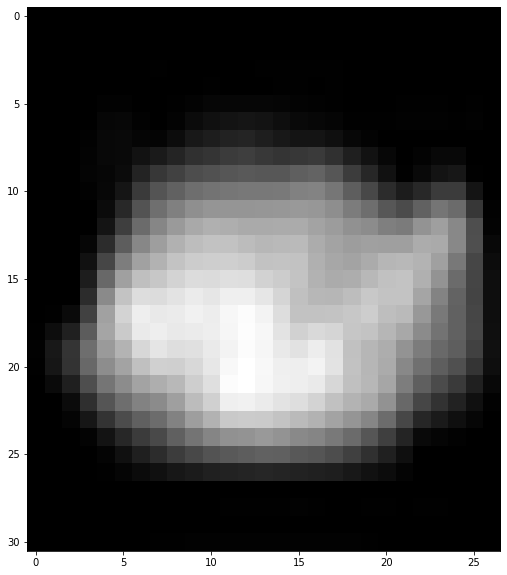

In [149]:
plot_drr(nod_only)

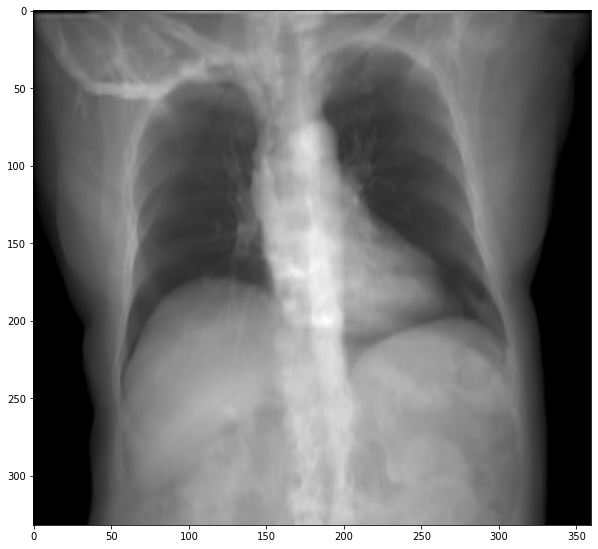

In [150]:
plot_drr(subtract_nodule(img, nod))

In [151]:
img_1, mask_1 = load_lidcset(1)

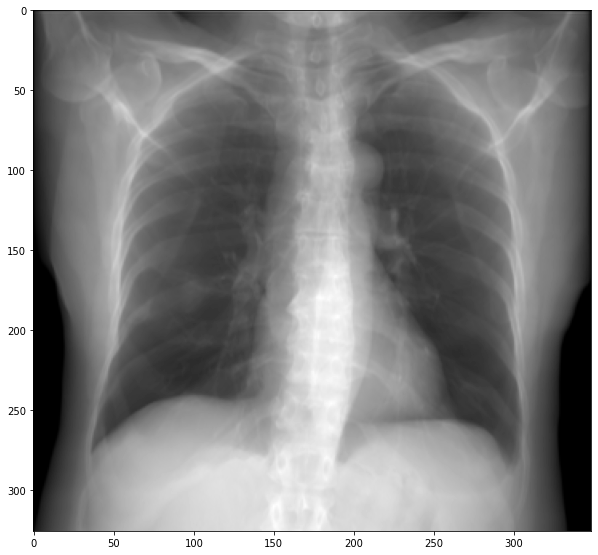

In [152]:
plot_drr(img_1)

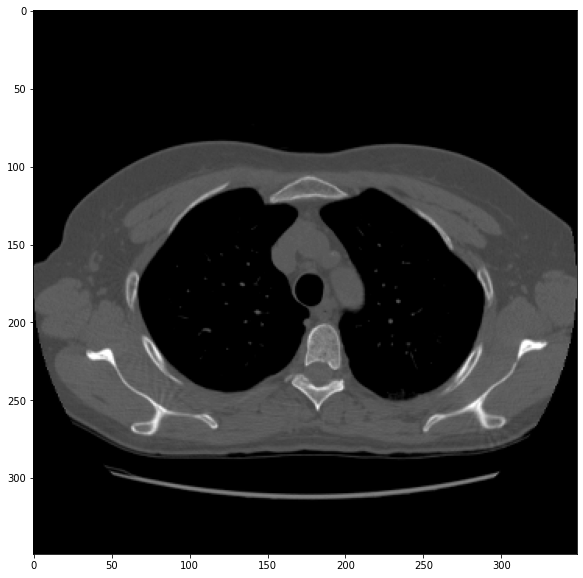

In [178]:
plt.imshow(img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')

In [153]:
def nod_img(img, nod, location):
    nod_img = img.copy()
    mask = np.zeros(nod_img.shape)
    
    ns = nod.shape
    mask[location[0]:location[0]+ns[0], location[1]:location[1]+ns[1], location[2]:location[2]+ns[2]] = nod
    
    nod_img = np.where(mask!=0, mask, img)
    
    return nod_img, mask

In [311]:
location = [210, 220, 130]

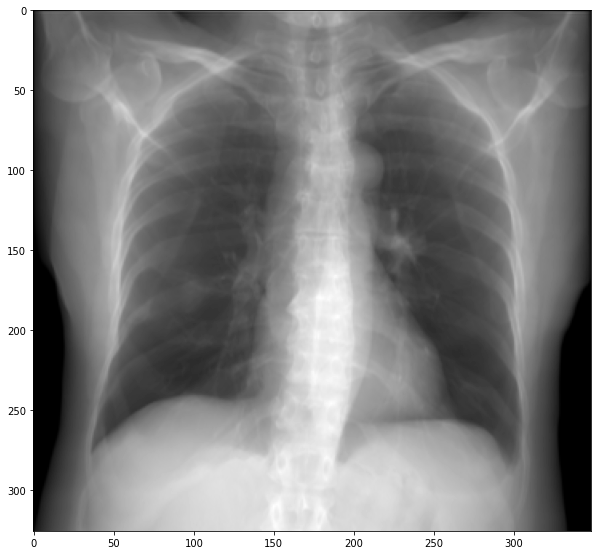

In [312]:
nod_img_1, nod_img_1_mask = nod_img(img_1, nod_only, location)
plot_drr(nod_img_1)

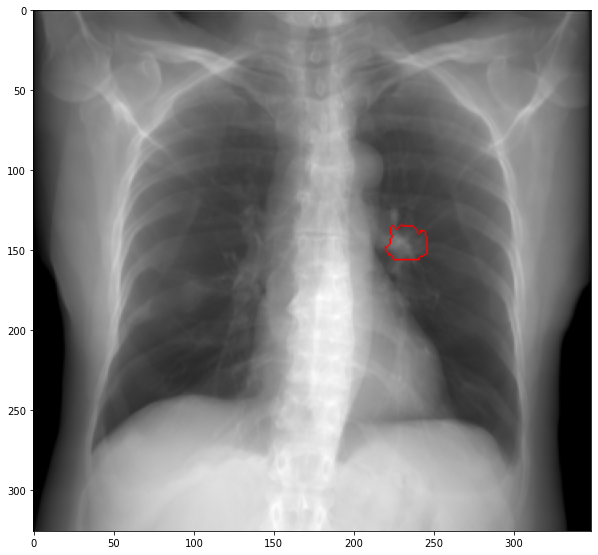

In [313]:
plot_contour(nod_img_1, nod_img_1_mask)

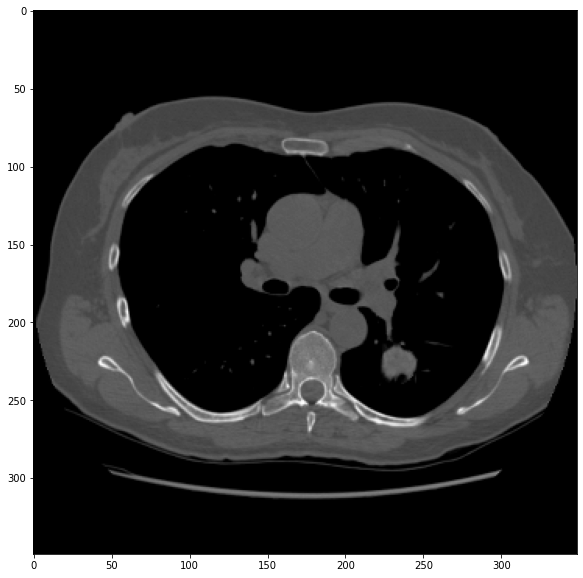

In [314]:
plt.imshow(nod_img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')

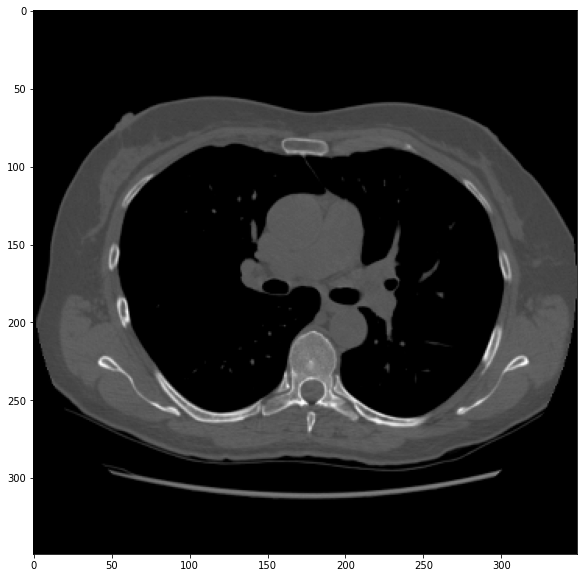

In [191]:
plt.imshow(img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')